In [1]:
import pandas as pd
import datetime
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
font = {'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
#os.chdir("/root/Envs/btc-analysis/btc-price-analysis")
time_format = "%Y-%m-%dT%H:%M:%SZ"

### Indico.io sentiment score analysis

In [2]:
score_data = pd.read_csv("../data/indico_nyt_bitcoin.csv", index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x, time_format))
score_data.head()

,headline,indico_score
time,,
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.599536
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.599536
2012-04-12 14:30:13,Canada Seeks to Turn Coins Into Digital Currency,0.429367
2013-03-12 20:28:27,Today's Scuttlebot: Bitcoin Problem and Tracki...,0.486258
2013-04-08 00:00:00,"Bubble or No, This Virtual Currency Is a Lot o...",0.469938


#### Compute average sentiment score per week

make it 0.5 if no news that week.

In [3]:
weekly_score = score_data.resample('w', how='mean').loc['2013':].fillna(0.5)
weekly_score.head()

,indico_score
time,
2013-01-06,0.5
2013-01-13,0.5
2013-01-20,0.5
2013-01-27,0.5
2013-02-03,0.5


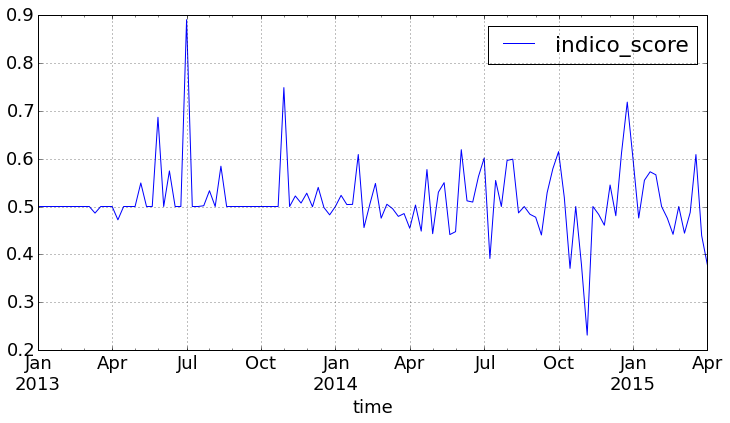

In [4]:
weekly_score.plot()

read bitcoin price data

In [5]:
time_format = "%Y-%m-%dT%H:%M:%S"
data = pd.read_csv("../data/price.csv", names=['time', 'price'], index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x[:-6], time_format))
bpi = data.resample('w', how='ohlc')
bpi.index.name = 'time'
bpi = pd.DataFrame(bpi['price']['close']).loc['2013':]
bpi.head()

,close
time,
2013-01-06,13.45
2013-01-13,14.19
2013-01-20,16.10
2013-01-27,17.87
2013-02-03,20.87


In [6]:
trend_bpi = pd.merge(weekly_score, bpi, how='right', left_index=True, right_index=True)
trend_bpi.columns = ['sentiment', 'close_price']
trend_bpi.head()

,sentiment,close_price
time,,
2013-01-06,0.5,13.45
2013-01-13,0.5,14.19
2013-01-20,0.5,16.10
2013-01-27,0.5,17.87
2013-02-03,0.5,20.87


add news volume data

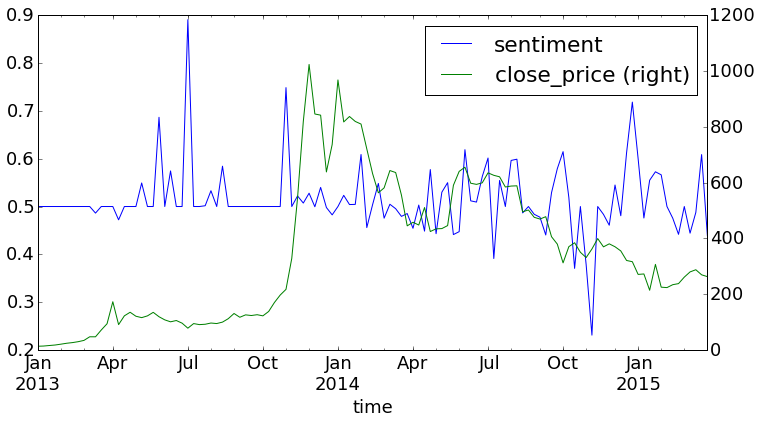

In [7]:
trend_bpi.plot(secondary_y='close_price')

In [8]:
trend_bpi.corr()

,sentiment,close_price
sentiment,1.000000,-0.049097
close_price,-0.049097,1.000000


### AlchemyAPI sentiment score

In [9]:
time_format = "%Y-%m-%dT%H:%M:%SZ"
alchemy_data = pd.read_csv("../data/alchemy_nyt_bitcoin.csv"
                           , index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x, time_format))
alchemy_data.head()

,headline,alchemy_score
time,,
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.441828
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.441828
2012-04-12 14:30:13,Canada Seeks to Turn Coins Into Digital Currency,-0.455343
2013-03-12 20:28:27,Today's Scuttlebot: Bitcoin Problem and Tracki...,-0.269256
2013-04-08 00:00:00,"Bubble or No, This Virtual Currency Is a Lot o...",0.000000


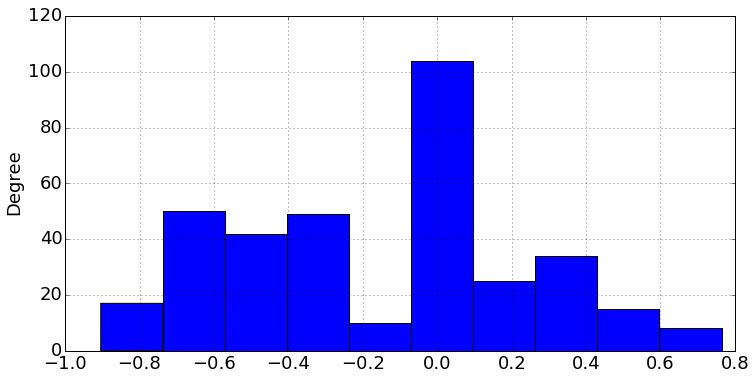

In [10]:
alchemy_data.alchemy_score.plot(kind='hist')

In [11]:
alchemy_data.describe()

,alchemy_score
count,354.000000
mean,-0.155515
std,0.388894
min,-0.904647
25%,-0.490099
50%,0.000000
75%,0.000000
max,0.764060


In [12]:
weekly_alchemy = alchemy_data.resample('w', how='mean').loc['2013':].fillna(0.0)
weekly_alchemy.head()

,alchemy_score
time,
2013-01-06,0
2013-01-13,0
2013-01-20,0
2013-01-27,0
2013-02-03,0


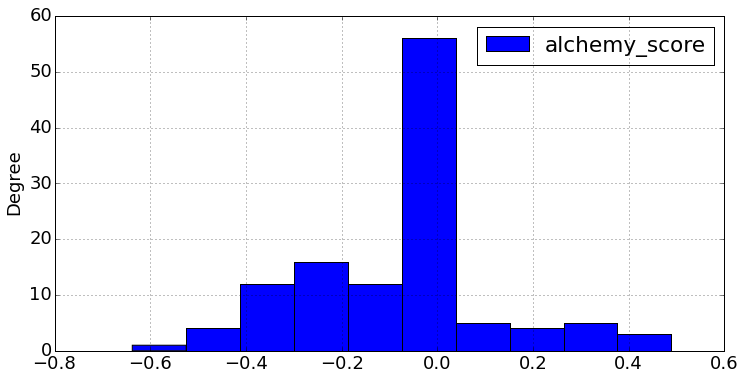

In [13]:
weekly_alchemy.plot(kind='hist')

In [14]:
weekly_alchemy.describe()

,alchemy_score
count,118.000000
mean,-0.069694
std,0.199747
min,-0.638104
25%,-0.196021
50%,0.000000
75%,0.000000
max,0.488949


In [15]:
alchemy_bpi = pd.merge(weekly_alchemy, bpi, how='right', left_index=True, right_index=True)
alchemy_bpi.columns = ['sentiment', 'close_price']
alchemy_bpi.head()

,sentiment,close_price
time,,
2013-01-06,0,13.45
2013-01-13,0,14.19
2013-01-20,0,16.10
2013-01-27,0,17.87
2013-02-03,0,20.87


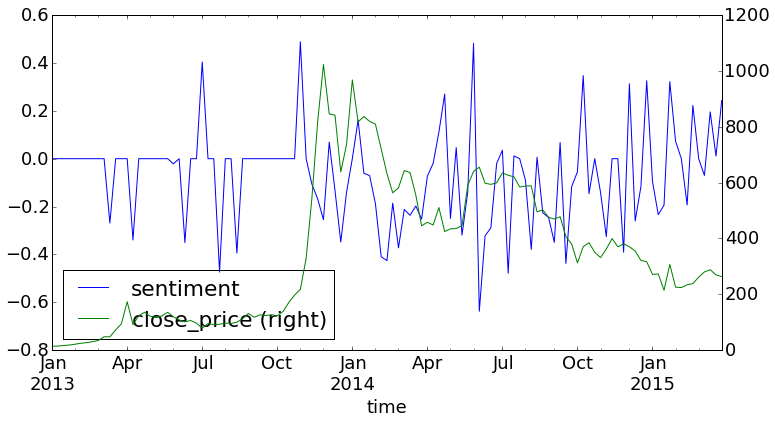

In [16]:
alchemy_bpi.plot(secondary_y='close_price')

In [17]:
merged_data = pd.merge(alchemy_bpi, weekly_score, how='right', left_index=True, right_index=True)
merged_data.head()

,sentiment,close_price,indico_score
time,,,
2013-01-06,0,13.45,0.5
2013-01-13,0,14.19,0.5
2013-01-20,0,16.10,0.5
2013-01-27,0,17.87,0.5
2013-02-03,0,20.87,0.5


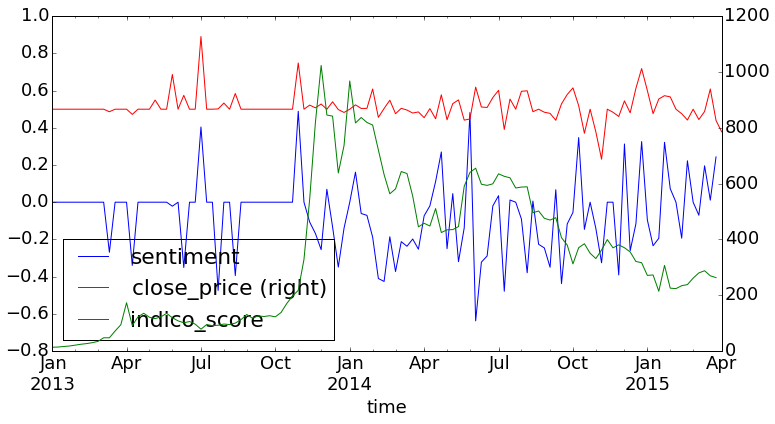

In [18]:
merged_data.plot(secondary_y='close_price')

In [19]:
merged_data.corr()

,sentiment,close_price,indico_score
sentiment,1.000000,-0.251972,0.275264
close_price,-0.251972,1.000000,-0.049097
indico_score,0.275264,-0.049097,1.000000


### Daily score analysis

Previously we only consider average weekly score. As news spread pretty fast, it is possible that its effect is occurring in shorter time. Therefore we try to plot daily score data.

In [20]:
daily_alchemy = alchemy_data.resample('d', how='mean').loc['2013':].fillna(0.0)
daily_alchemy.head()

,alchemy_score
time,
2013-01-01,0
2013-01-02,0
2013-01-03,0
2013-01-04,0
2013-01-05,0


In [21]:
daily_price = data.resample('d', how='ohlc')
daily_price.index.name = 'time'
daily_price = pd.DataFrame(daily_price['price']['close']).loc['2013':]
daily_price.head()

,close
time,
2013-01-01,13.38
2013-01-02,13.38
2013-01-03,13.40
2013-01-04,13.46
2013-01-05,13.36


In [22]:
daily_data = pd.merge(daily_price, daily_alchemy, how='right', left_index=True, right_index=True)
daily_data.head()

,close,alchemy_score
time,,
2013-01-01,13.38,0
2013-01-02,13.38,0
2013-01-03,13.40,0
2013-01-04,13.46,0
2013-01-05,13.36,0


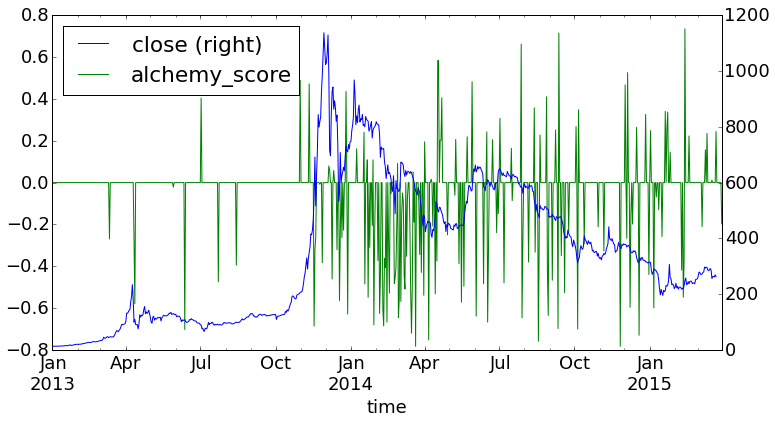

In [23]:
daily_data.plot(secondary_y='close')

# Prediction

### Weekly prediction first

In [24]:
alchemy_bpi['avg_sentiment'] = pd.rolling_mean(alchemy_bpi.sentiment, 1)
alchemy_bpi.head()

,sentiment,close_price,avg_sentiment
time,,,
2013-01-06,0,13.45,0
2013-01-13,0,14.19,0
2013-01-20,0,16.10,0
2013-01-27,0,17.87,0
2013-02-03,0,20.87,0


In [25]:
alchemy_bpi['avg_shifted'] = alchemy_bpi['avg_sentiment'].shift(1)
alchemy_bpi.head()

,sentiment,close_price,avg_sentiment,avg_shifted
time,,,,
2013-01-06,0,13.45,0,NaN
2013-01-13,0,14.19,0,0
2013-01-20,0,16.10,0,0
2013-01-27,0,17.87,0,0
2013-02-03,0,20.87,0,0


In [26]:
alchemy_bpi['order']= 'NA'
alchemy_bpi['diff'] = alchemy_bpi.sentiment - alchemy_bpi.avg_shifted
alchemy_bpi.head()

,sentiment,close_price,avg_sentiment,avg_shifted,order,diff
time,,,,,,
2013-01-06,0,13.45,0,NaN,NA,NaN
2013-01-13,0,14.19,0,0,NA,0
2013-01-20,0,16.10,0,0,NA,0
2013-01-27,0,17.87,0,0,NA,0
2013-02-03,0,20.87,0,0,NA,0


In [27]:
## SII_diff >= diff => search interest rises this week => price rises next week
alchemy_bpi.loc[alchemy_bpi['diff'] > 0,'order'] = False
## SII_diff < diff => search interest falls this week => price falls next week
alchemy_bpi.loc[alchemy_bpi['diff'] < 0,'order'] = True
alchemy_bpi.head()

,sentiment,close_price,avg_sentiment,avg_shifted,order,diff
time,,,,,,
2013-01-06,0,13.45,0,NaN,NA,NaN
2013-01-13,0,14.19,0,0,NA,0
2013-01-20,0,16.10,0,0,NA,0
2013-01-27,0,17.87,0,0,NA,0
2013-02-03,0,20.87,0,0,NA,0


In [28]:
alchemy_bpi['trend'] = alchemy_bpi.close_price > alchemy_bpi.close_price.shift(1)
alchemy_bpi.head()

,sentiment,close_price,avg_sentiment,avg_shifted,order,diff,trend
time,,,,,,,
2013-01-06,0,13.45,0,NaN,NA,NaN,False
2013-01-13,0,14.19,0,0,NA,0,True
2013-01-20,0,16.10,0,0,NA,0,True
2013-01-27,0,17.87,0,0,NA,0,True
2013-02-03,0,20.87,0,0,NA,0,True


In [29]:
total_predict = alchemy_bpi[alchemy_bpi.order!='NA'].order.count()
total_correct = alchemy_bpi[alchemy_bpi.order==alchemy_bpi.trend].order.count()
print "TP+TN: %f (%d/%d)" % (total_correct/float(total_predict), total_correct, total_predict)

TP+TN: 0.517241 (45/87)


In [30]:
alchemy_bpi.corr()

,sentiment,close_price,avg_sentiment,avg_shifted,diff,trend
sentiment,1.000000,-0.251972,1.000000,-0.003504,0.711915,0.088532
close_price,-0.251972,1.000000,-0.251972,-0.236706,-0.011179,-0.113242
avg_sentiment,1.000000,-0.251972,1.000000,-0.003504,0.711915,0.088532
avg_shifted,-0.003504,-0.236706,-0.003504,1.000000,-0.704756,0.090665
diff,0.711915,-0.011179,0.711915,-0.704756,1.000000,0.001826
trend,0.088532,-0.113242,0.088532,0.090665,0.001826,1.000000


### Daily prediction

In [109]:
daily_data = pd.merge(daily_price, daily_alchemy, how='right', left_index=True, right_index=True)
daily_data['avg_sentiment'] = pd.rolling_mean(daily_data.alchemy_score, 1)
daily_data.head()

,close,alchemy_score,avg_sentiment
time,,,
2013-01-01,13.38,0,0
2013-01-02,13.38,0,0
2013-01-03,13.40,0,0
2013-01-04,13.46,0,0
2013-01-05,13.36,0,0


In [110]:
daily_data['avg_shifted'] = daily_data['avg_sentiment'].shift(3)
daily_data.head()

,close,alchemy_score,avg_sentiment,avg_shifted
time,,,,
2013-01-01,13.38,0,0,NaN
2013-01-02,13.38,0,0,NaN
2013-01-03,13.40,0,0,NaN
2013-01-04,13.46,0,0,0
2013-01-05,13.36,0,0,0


In [111]:
daily_data['order']= 'NA'
daily_data['diff'] = daily_data.alchemy_score - daily_data.avg_shifted
daily_data.head()

,close,alchemy_score,avg_sentiment,avg_shifted,order,diff
time,,,,,,
2013-01-01,13.38,0,0,NaN,NA,NaN
2013-01-02,13.38,0,0,NaN,NA,NaN
2013-01-03,13.40,0,0,NaN,NA,NaN
2013-01-04,13.46,0,0,0,NA,0
2013-01-05,13.36,0,0,0,NA,0


In [112]:
## SII_diff >= diff => search interest rises this week => price rises next week
daily_data.loc[daily_data['diff'] > 0,'order'] = True
## SII_diff < diff => search interest falls this week => price falls next week
daily_data.loc[daily_data['diff'] < 0,'order'] = False
daily_data.head()

,close,alchemy_score,avg_sentiment,avg_shifted,order,diff
time,,,,,,
2013-01-01,13.38,0,0,NaN,NA,NaN
2013-01-02,13.38,0,0,NaN,NA,NaN
2013-01-03,13.40,0,0,NaN,NA,NaN
2013-01-04,13.46,0,0,0,NA,0
2013-01-05,13.36,0,0,0,NA,0


In [113]:
daily_data['trend'] = daily_data.close > daily_data.close.shift(1)
daily_data.head()

,close,alchemy_score,avg_sentiment,avg_shifted,order,diff,trend
time,,,,,,,
2013-01-01,13.38,0,0,NaN,NA,NaN,False
2013-01-02,13.38,0,0,NaN,NA,NaN,False
2013-01-03,13.40,0,0,NaN,NA,NaN,True
2013-01-04,13.46,0,0,0,NA,0,True
2013-01-05,13.36,0,0,0,NA,0,False


In [114]:
total_predict = daily_data[daily_data.order!='NA'].order.count()
total_correct = daily_data[daily_data.order==daily_data.trend].order.count()
print "TP+TN: %f (%d/%d)" % (total_correct/float(total_predict), total_correct, total_predict)

TP+TN: 0.532091 (257/483)
